# Load packages and data

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install missingno
!pip install sklearn.cross_validation

     - 53.5MB 616kB/s
     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 604kB 7.7MB/s 
     |████████████████████████████████| 3.1MB 13.2MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
     |████████████████████████████████| 296kB 27.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=8409904f54cb8d47893bf605dd08c1a8b9f8464e170c917814179cf919dc743c
  Stored in directory: /tmp/pip-ephem-wheel-cache-_aokv0zg/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=1338dbf593a7d8263625b7dae4582ba03381f40bb3bcce21756b7a541ab8859f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully unins

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
import pandas_profiling
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import iplot
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
creditcard = joined_data = pd.read_csv('/content/drive/My Drive/Case Study/creditcard.csv')

# EDA

In [ ]:
# pandas profiling report saved as html for the entire dataset
profile = creditcard.profile_report(title='Credit Card Data Report', minimal = True)
profile.to_file(output_file="Credit Card Data Report.html")

In [ ]:
fraud_df = creditcard.loc[creditcard['Class'] ==1]

In [ ]:
# pandas profiling report saved as html for fraud data
profile_fraud = fraud_df.profile_report(title='Fraud Data Report', minimal = True)
profile_fraud.to_file(output_file="Fraud Data Report.html")

NameError: ignored

In [ ]:
# duplicate rows
creditcard[creditcard.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,-1.440241,-0.511918,0.607878,-0.627645,1.023032,-0.888334,0.413444,1.860351,1.316597,1.094512,-0.791037,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [ ]:
# get ride of duplicate rows
creditcard = creditcard.drop_duplicates()

In [ ]:
# correlation
corrMatrix = creditcard.corr()
heatmap = sn.heatmap(corrMatrix)
heatmap.set_title('Heat Map for Credit Card Data')
plt.show()

In [ ]:
# correlation for fraud
corrMatrix_fraud = fraud_df.corr()
heatmap_fraud = sn.heatmap(corrMatrix_fraud)
heatmap_fraud.set_title('Heat Map for Fraud Data')
plt.show()

In [ ]:
# time and class distribution

class_0 = creditcard.loc[creditcard['Class'] == 0]["Time"]
class_1 = creditcard.loc[creditcard['Class'] == 1]["Time"]
#plt.figure(figsize = (14,4))
#plt.title('Credit Card Transactions Time Density Plot')
#sns.set_color_codes("pastel")
#sns.distplot(class_0,kde=True,bins=480)
#sns.distplot(class_1,kde=True,bins=480)
#plt.show()
hist_data = [class_0, class_1]
group_labels = ['normal', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [ ]:
#Looking the V's features
columns = creditcard.iloc[:,1:29].columns

frauds = creditcard.Class == 1
normals = creditcard.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(creditcard[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(creditcard[col][frauds], color='g')
    sns.distplot(creditcard[col][normals], color='r')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=creditcard, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Scaling

In [ ]:
#scaling
rob_scaler = RobustScaler()

creditcard['scaled_amount'] = rob_scaler.fit_transform(creditcard['Amount'].values.reshape(-1,1))
creditcard['scaled_time'] = rob_scaler.fit_transform(creditcard['Time'].values.reshape(-1,1))

creditcard.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
creditcard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


In [ ]:
creditcard_df = creditcard.copy()

# Modeling

In [ ]:
def data_prepration(x): 
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,random_state=42,test_size=0.2)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [ ]:
clf= RandomForestClassifier(n_estimators=100)

In [ ]:
Count_Normal_transacation = len(creditcard_df[creditcard_df["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(creditcard_df[creditcard_df["Class"]==1]) # fraud by 1

Undersampling:


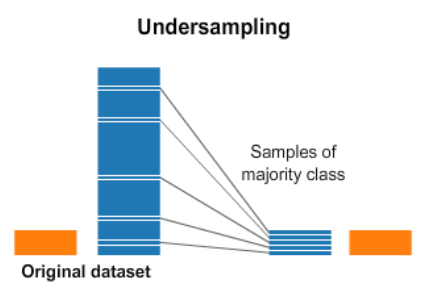

In [ ]:

# function for make undersample data with different proportion
# different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times):#normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = undersample_data.tolist()
    undersample_data = creditcard_df.loc[undersample_data]
    
    print("the normal transacation proportion is :", len(undersample_data[undersample_data["Class"]==0])/len(undersample_data))
    print("the fraud transacation proportion is :", len(undersample_data[undersample_data["Class"]==1])/len(undersample_data))
    print("total number of record in resampled data is:",len(undersample_data))
    return(undersample_data)

In [ ]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    pred_prob = clf.predict_proba(features_test)
    accuracy = accuracy_score(labels_test, pred)
    cnf_matrix=confusion_matrix(labels_test,pred)

    fig= plt.figure(figsize=(6,3))# to plot the graph
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    print("TPR for the two class", TPR)
    print("TNR for the two class", TNR)
    print("FPR for the two class", FPR)
    print("FNR for the two class", FNR)
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("Accuracy:", accuracy)
    print("Confusion matrix:", cnf_matrix)
    
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

In [ ]:
data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(creditcard_df)

data_train = pd.concat([data_features_train, data_labels_train], axis=1)

length of training data
226980
length of test data
56746


In [ ]:
# get index
fraud_indices= np.array(data_train[data_train.Class==1].index)
normal_indices = np.array(data_train[data_train.Class==0].index)

the undersample data for 1 proportion

the normal transacation proportion is : 0.552570093457944
the fraud transacation proportion is : 0.44742990654205606
total number of record in resampled data is: 856
------------------------------------------------------------

the model classification for 1 proportion


TPR for the two class [0.97693095 0.86666667]
TNR for the two class [0.86666667 0.97693095]
FPR for the two class [0.13333333 0.02306905]
FNR for the two class [0.02306905 0.13333333]
TP 78
TN 55349
FP 1307
FN 12


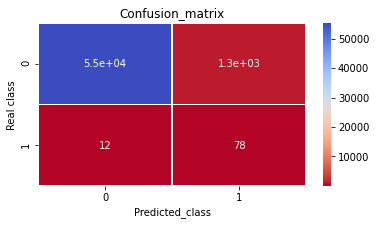

Accuracy: 0.9767560709124872
Confusion matrix: [[55349  1307]
 [   12    78]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.87      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

_________________________________________________________________________________________


In [ ]:
#let us train this model using undersample data and test for the whole data test set 
print("the undersample data for {} proportion".format(1))
print()
Undersample_data = undersample(normal_indices,fraud_indices,1)
print("------------------------------------------------------------")
print()
print("the model classification for {} proportion".format(1))
print()


undersample_features_train = Undersample_data.loc[:, Undersample_data.columns != 'Class']
undersample_labels_train = Undersample_data.loc[:, Undersample_data.columns == 'Class']
 

#the partion for whole data
print()
model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
# here training for the undersample data but tatsing for whole data
print("_________________________________________________________________________________________")

In [ ]:
featimp = pd.Series(clf.feature_importances_,index=data_features_train.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features use

V14              0.177355
V4               0.108947
V12              0.102675
V17              0.102088
V10              0.092359
V11              0.086063
V16              0.063123
V3               0.041359
V2               0.033695
V7               0.023265
V18              0.016165
V21              0.015384
V9               0.013925
V19              0.012273
V6               0.010674
scaled_amount    0.010251
V5               0.009305
V20              0.007861
V8               0.007386
V22              0.007357
V26              0.007256
V28              0.006579
V13              0.006279
V15              0.006204
V23              0.006095
V1               0.005968
V27              0.005407
V25              0.005316
V24              0.005134
scaled_time      0.004252
dtype: float64


Oversampling:

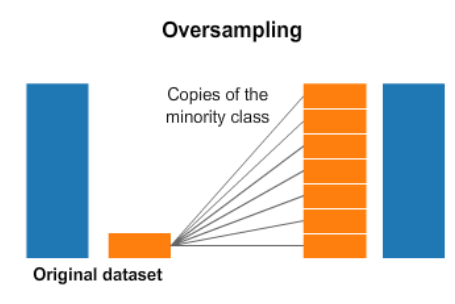

In [ ]:
creditcard_df = creditcard.copy()

In [ ]:
data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(creditcard_df)

length of training data
226980
length of test data
56746


In [ ]:
data_train = pd.concat([data_features_train, data_labels_train], axis=1)

In [ ]:
count_class_0, count_class_1 = data_train.Class.value_counts()

In [ ]:
df_class_0 = data_train[data_train['Class'] == 0]
df_class_1 = data_train[data_train['Class'] == 1]

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

Random over-sampling:
1    226597
0    226597
Name: Class, dtype: int64


In [ ]:
os_data = df_test_over.copy()

In [ ]:
# Now start oversamoling of training data 
# means we will duplicate many times the value of fraud data

print("length of oversampled data is ",len(os_data))
print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))

length of oversampled data is  453194
Number of normal transcation in oversampled data 226597
No.of fraud transcation 226597
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


the undersample data for 1 proportion

------------------------------------------------------------

the model classification for 1 proportion


TPR for the two class [0.99994705 0.73333333]
TNR for the two class [0.73333333 0.99994705]
FPR for the two class [2.66666667e-01 5.29511437e-05]
FNR for the two class [5.29511437e-05 2.66666667e-01]
TP 66
TN 56653
FP 3
FN 24


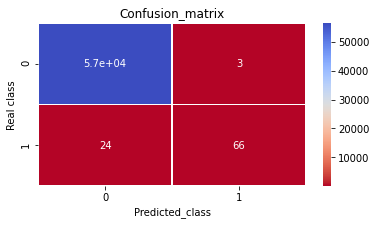

Accuracy: 0.9995241955380115
Confusion matrix: [[56653     3]
 [   24    66]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.73      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

_________________________________________________________________________________________


In [ ]:
print("the undersample data for {} proportion".format(1))
print()
os_data
print("------------------------------------------------------------")
print()
print("the model classification for {} proportion".format(1))
print()

os_features_train = os_data.loc[:, os_data.columns != 'Class']
os_labels_train = os_data.loc[:, os_data.columns == 'Class']
 
#the partion for whole data
print()
model(clf,os_features_train,data_features_test,os_labels_train,data_labels_test)
print("_________________________________________________________________________________________")

In [ ]:
featimp = pd.Series(clf.feature_importances_,index=data_features_train.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features use

V14              0.188747
V10              0.136220
V12              0.131169
V17              0.098858
V4               0.077442
V11              0.053725
V3               0.048945
V16              0.037296
V9               0.020970
V2               0.020458
V21              0.016782
V19              0.015157
V7               0.013248
V27              0.012786
scaled_amount    0.012049
V1               0.011163
V20              0.010766
V5               0.010184
V18              0.010008
V8               0.009584
V26              0.008306
V28              0.007101
V15              0.007089
V13              0.007052
V6               0.006544
V22              0.006409
scaled_time      0.006274
V23              0.005951
V25              0.005608
V24              0.004110
dtype: float64


SMOTE:

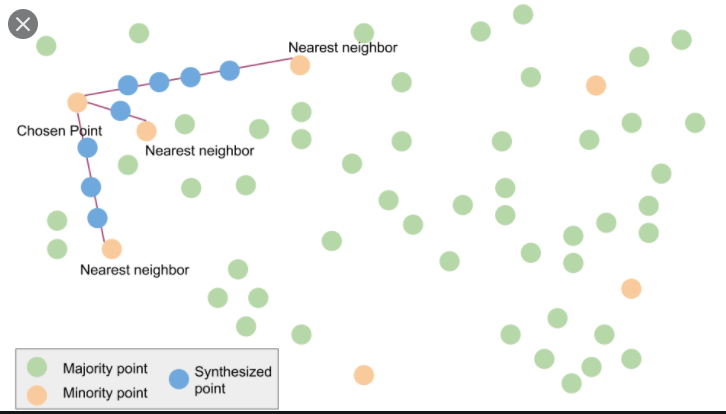

In [ ]:
creditcard_df = creditcard.copy()

In [ ]:
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
# now we can devided our data into training and test data
# Call our method data prepration on our dataset
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(creditcard_df)
columns = data_train_X.columns

length of training data
226980
length of test data
56746


In [ ]:
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("Number of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



length of oversampled data is  453194
Number of normal transcation in oversampled data 226597
Number of fraud transcation 226597
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


TPR for the two class [0.9998941  0.77777778]
TNR for the two class [0.77777778 0.9998941 ]
FPR for the two class [2.22222222e-01 1.05902287e-04]
FNR for the two class [1.05902287e-04 2.22222222e-01]
TP 70
TN 56650
FP 6
FN 20


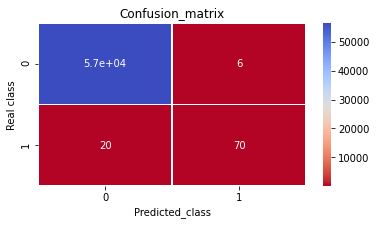

Accuracy: 0.9995418179254926
Confusion matrix: [[56650     6]
 [   20    70]]

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.78      0.84        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

In [ ]:
featimp = pd.Series(clf.feature_importances_,index=data_train_X.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features use

V14              0.211448
V10              0.161431
V12              0.115760
V11              0.091926
V4               0.082355
V17              0.062243
V3               0.028988
V16              0.027482
V2               0.025238
V7               0.023011
V9               0.018398
V18              0.014713
V8               0.012793
V19              0.012687
scaled_amount    0.010396
V6               0.009846
V1               0.009198
V5               0.008623
V21              0.008451
V13              0.007919
V20              0.007328
scaled_time      0.006924
V26              0.006168
V23              0.006094
V27              0.006036
V28              0.005665
V25              0.005140
V15              0.004997
V22              0.004562
V24              0.004183
dtype: float64
